In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime
import os
import pickle

In [2]:
data = pd.read_csv('../data/Bokhoven.csv')

In [3]:
data.head()

,Unnamed: 0,datumBeginMeting,hstWaarde,Bokhoven,Begin,cumsum_previous_15,rain_-15_class
0,0,2018-01-01 00:00:00,1200.0,0.0583,2018-01-01 00:00:00,0.0583,1
1,1,2018-01-01 01:00:00,940.0,0.0448,2018-01-01 01:00:00,0.1031,1
2,2,2018-01-01 02:00:00,0.0,0.1409,2018-01-01 02:00:00,0.2440,1
3,3,2018-01-01 03:00:00,280.0,0.0714,2018-01-01 03:00:00,0.3154,1
4,4,2018-01-01 04:00:00,150.0,0.1340,2018-01-01 04:00:00,0.4494,1


In [4]:
def AddColumnsPred(df):
    '''
    Input:      - df with predictions per pump
    Output:     - df with extra features
    '''
    df['datetime'] = pd.to_datetime(df['dates'])
    df['Date'] = pd.DatetimeIndex(df.datetime).normalize()
    df['Weekday'] = df['datetime'].dt.day_name()
    df['Hour'] = df['datetime'].dt.hour
    df['TimeOfDay'] = df['datetime'].dt.time
    df['Year'] = df['datetime'].dt.year
    df['Month'] = df['datetime'].dt.month_name()
    df['Day'] = df['datetime'].dt.day
    df['DayofYear'] = df['datetime'].dt.dayofyear
    return df


def PrepareDfPred(df):
    '''
    Input:      - df with predictions per pump
    Output:     - df with only the necesary columns
    '''
    # remove all features
    df = df[['flow','rain_hour', 'level', 'rain_N_ago', 'dates', 'predictions']]
    
    # add columns with extra features
    df = AddColumnsPred(df)
   
    # add error columns
    df['error'] = df['flow'] - df['predictions']
    df['sq_error'] = df['error']**2
    df['rse'] = abs(df['error'])
    df['diff'] = df['flow'] - df['predictions']
    return df

In [5]:
df = PrepareDfPred(data)

KeyError: "['flow' 'rain_hour' 'level' 'rain_N_ago' 'dates' 'predictions'] not in index"

In [ ]:
df.head()

In [ ]:
data.drop('Unnamed: 0', axis=1, inplace=True) #drop the old indecies
data['datumBeginMeting'] = pd.to_datetime(data["dates"],format='%Y-%m-%d %H:%M:%S')
data = data.set_index('datumBeginMeting', inplace=False)

In [ ]:
dry = data[data['rain_N_ago'] == 0]


In [ ]:
days = mdates.date2num((dry.index))

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(111)

ax1.plot(dry.index, dry['flow'], label = 'Actual flow', color='orange', linewidth = 1.5)
ax1.plot(dry.index, dry['predictions'], label = 'Predicted flow', color = 'red', linewidth = 1.5)
ax1.set_ylabel('Flow', fontsize = 10)


plt.title('Actual flow vs. dry weather predictions over time', fontsize = 15)
plt.grid()
fig.legend()
fig.tight_layout();
#fig.savefig("../graphs/"+"FlowBehavior_new.png")

# MSE

In [ ]:
dry['Root Squared Error'] = ((dry['flow'] - dry['predictions'])**2)**0.5
dry['Squared Error'] = ((dry['flow'] - dry['predictions'])**2)
dry['diff'] = (dry['predictions'] - dry['flow'])

In [ ]:
dry['Squared Error'].mean()**.5

In [ ]:
days = mdates.date2num((dry.index))

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(111)

ax1.plot(dry.index, dry['Squared Error'], color='darkblue', linewidth = 1.5)
#ax1.plot(data.index, data['predictions'], label = 'Predicted flow', color = 'red', linewidth = 1.5)
ax1.set_ylabel('Squared Error', fontsize = 10)


plt.title('Squared errors over time for dry weather predictions', fontsize = 15)
plt.grid()
#fig.legend()
fig.tight_layout();
#fig.savefig("../graphs/"+"FlowBehavior_new.png")

In [ ]:
days = mdates.date2num((dry.index))

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(111)

ax1.plot(dry.index, dry['Root Squared Error'], color='darkblue', linewidth = 1.5)

ax1.axhline(dry['Root Squared Error'].mean(), linewidth = 3, color = 'red')
ax1.annotate('RMSE \n' + str(107), (mdates.date2num(datetime.date(2019, 8, 23)), dry['Root Squared Error'].mean()+1), xytext=(15, 15), 
            textcoords='offset points', arrowprops=dict(color='darkred', arrowstyle='-|>'), color = 'darkred')
#ax1.plot(data.index, data['predictions'], label = 'Predicted flow', color = 'red', linewidth = 1.5)
ax1.set_ylabel('Root Squared Error', fontsize = 10)


plt.title('Root Squared errors over time for dry weather predictions', fontsize = 15)
plt.grid()
#fig.legend()
fig.tight_layout();
fig.savefig("../graphs/"+"RootSquaredError.png")

In [ ]:
days = mdates.date2num((dry.index))

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(111)

ax1.plot(data.index, data['flow'], label = 'Actual flow', color = 'red', linewidth = 1)
ax1.set_ylabel('Actual Flow', fontsize = 13, color = 'red')


ax2 = ax1.twinx()
ax2.plot(dry.index, dry['Root Squared Error'],label = 'Root Squared Error', color='darkblue', linewidth = 1.5)
ax2.set_ylabel('MSE', fontsize = 13, color = 'darkblue')


plt.title('Root Squared errors over time for dry weather predictions', fontsize = 17)
plt.grid()
fig.legend()
fig.tight_layout();
#fig.savefig("../graphs/"+"FlowBehavior_new.png")

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(dry['Root Squared Error'])
plt.title("Boxplot of Root Squared Errors", fontsize = 17)
plt.savefig('../graphs/RootBoxplot.png');

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(dry['Squared Error']);

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(df['diff'], bins=100, color= 'darkblue')
plt.title("Distribution of prediction variation for dry days in Bokhoven", fontsize = 17)
plt.grid()
plt.xlabel('Difference between actual and predicted values', fontsize = 12)
plt.savefig('../graphs/errordist.png');

In [ ]:
plt.figure(figsize=(15,10))
plt.bar(dry.index, dry['diff'])
plt.title("Distribution of prediction variation for dry days in Bokhoven", fontsize = 17)
plt.grid()
plt.ylabel('Difference between actual and predicted values', fontsize = 12)
plt.xlabel('Date')
#plt.savefig('../graphs/errordist.png');

In [ ]:
month = df.groupby('Month', sort=False)[['diff']].mean()

In [ ]:
plt.figure(figsize=(15,10))
plt.bar(month.index, month['diff'])
plt.title("Distribution of prediction variation for dry days in Bokhoven", fontsize = 17)
plt.grid()
plt.ylabel('Difference between actual and predicted values', fontsize = 12)
plt.xlabel('Month')
#plt.savefig('../graphs/errordist.png');

# Naive Model 

In [57]:
pumps = ["Bokhoven", "Hertogenbosch (Helftheuvelweg)",
                     "Hertogenbosch (Rompert)", "Hertogenbosch (Oude Engelenseweg)",
                     "Hertogenbosch (Maasport)"]

months = ['January', 'February', 'March', 'April', 'May', 
          'June', 'July', 'August', 'September', 
          'October', 'November', 'December']

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

#load in the errors per pump per month
#blob = {pump+'_'+month: pd.concat([pd.DataFrame(pickle.load(open('../data/pickleRick/'+str(pump)+str(i)+str(month)+'.dat', 'rb')))]) for pump,i,month in zip(pumps, range(100), months)}
blob = {}
for pump in pumps:
    df = pd.concat([pd.DataFrame(pickle.load(open('../data/pickleRick/'+str(pump)+str(i)+str(months[0])+'.dat', 'rb'))) for i in range(100)])
    result = pd.concat([df], keys=[months[0]], names=['Month'])
    for month in months[1:]:
        df = pd.concat([pd.DataFrame(pickle.load(open('../data/pickleRick/'+str(pump)+str(i)+str(month)+'.dat', 'rb'))) for i in range(100)])
        result = result.append(pd.concat([df], keys=[month], names=['Month']))
    blob[pump] = result
            

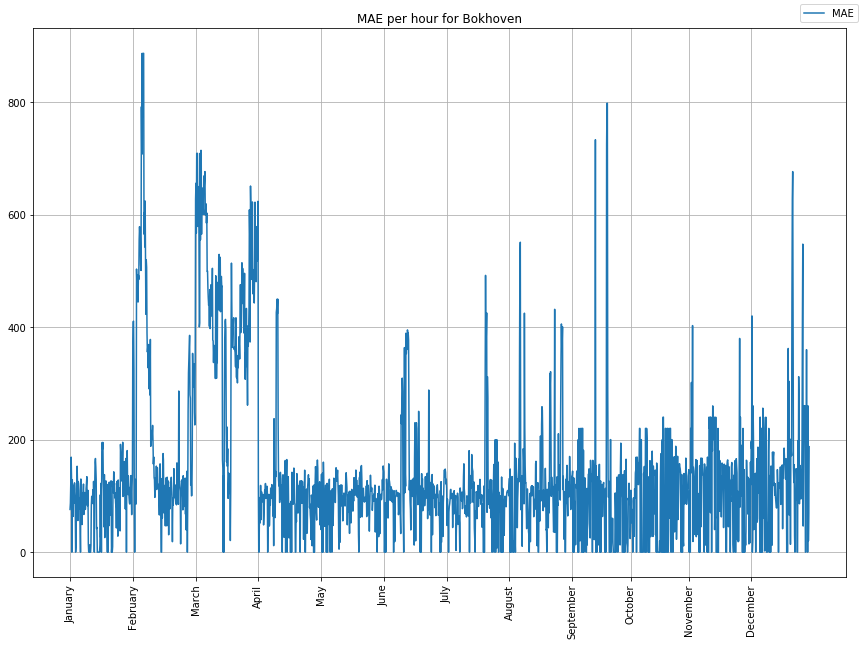

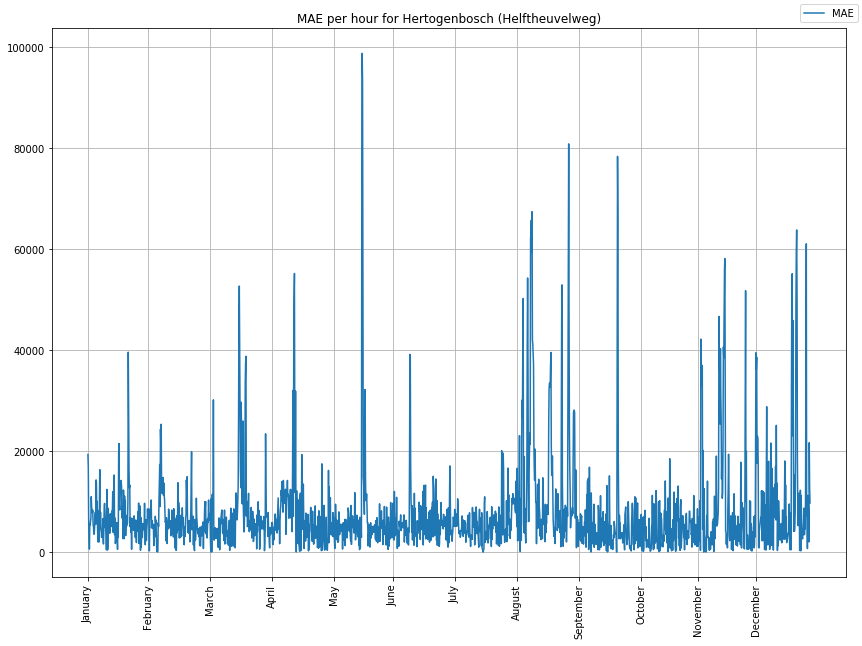

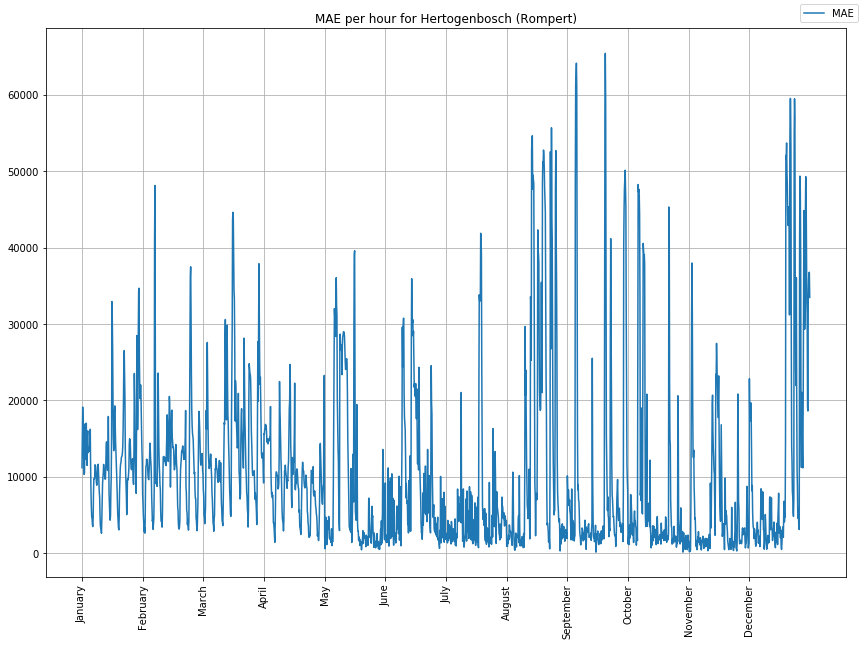

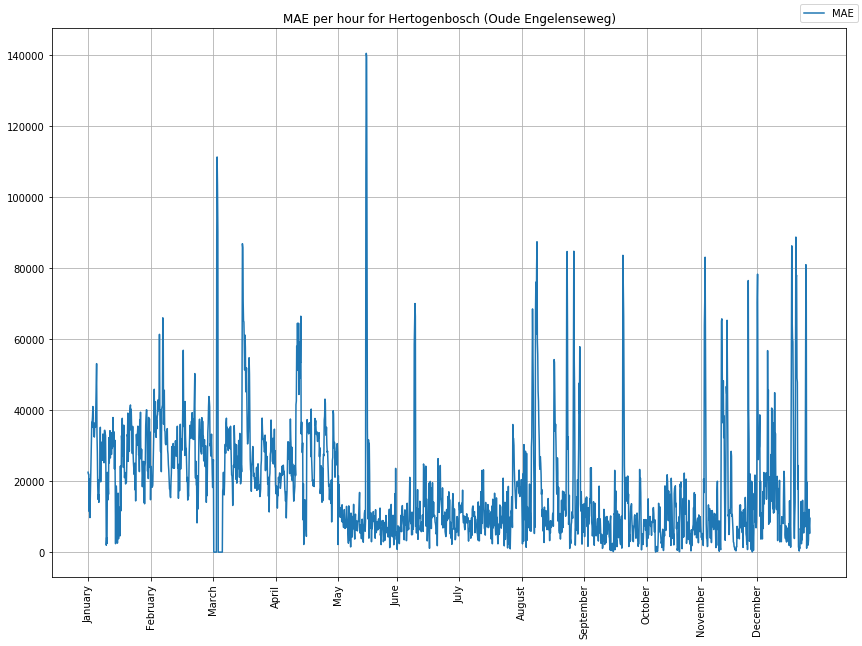

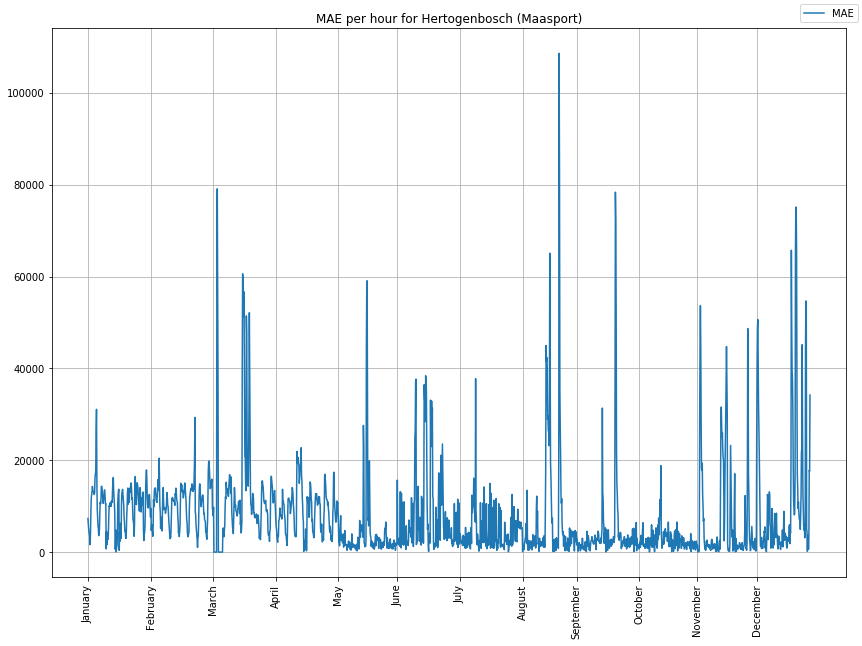

In [144]:
for q in range(len(pumps)):
    i0 = list(blob[pumps[q]].index.get_level_values(0))
    i1 = list(blob[pumps[q]].index.get_level_values(1))
    i2 = list(blob[pumps[q]].index.get_level_values(2))
    ind = [(i,k,l) for i,k,l in zip(i0, i1, i2)]
    df = pd.DataFrame(blob[pumps[q]].values, columns=['flow'])
    df.index = ind
    df['day'] = i1
    df['month'] = i0
    df['hour'] = i2
    for i in range(len(months)):
        df.loc[df['month'] == months[i], 'month'] = i
    for i in range(len(days)):
        df.loc[df['day'] == days[i], 'day'] = i
    df = df.sort_values(by=['month', 'day']).groupby(['month','day','hour']).mean()
    df['hour'] = df.index.get_level_values(2)
    df['day'] =  df.index.get_level_values(1)
    df['month'] = df.index.get_level_values(0)
    df = df.reset_index(drop=True)
    locs = [df[df['month'] == i].iloc[0].name for i in range(12)]
    fig, ax = plt.subplots(figsize = (12,9))
    df['flow'].plot(ax=ax, label = 'MAE')
    plt.xticks(locs, months, rotation='vertical')
    plt.title("MAE per hour for "+pumps[q])
    plt.grid()
    fig.legend()
    fig.tight_layout()
    plt.savefig("../graphs/MAE"+pumps[q]+".png")

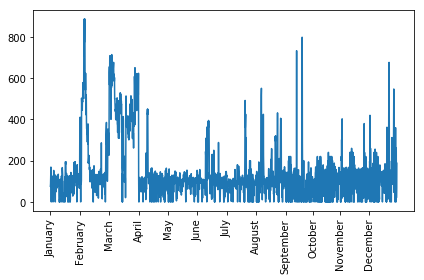

In [140]:
fig, ax = plt.subplots()
df['flow'].plot(ax=ax)
plt.xticks(locs, months, rotation='vertical')
fig.tight_layout()

In [111]:
df

,flow,hour,day,month
0,75.891473,0,0,0
1,87.093023,1,0,0
2,122.364341,2,0,0
3,168.875969,3,0,0
4,131.744186,4,0,0
5,0.000000,5,0,0
6,128.682171,6,0,0
7,97.751938,7,0,0
8,63.432558,8,0,0
9,118.733333,9,0,0


<Figure size 1080x720 with 0 Axes>

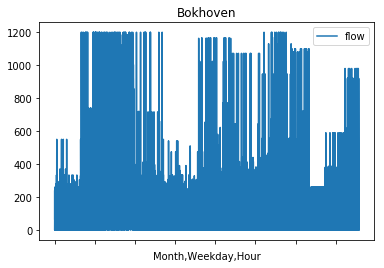

<Figure size 1080x720 with 0 Axes>

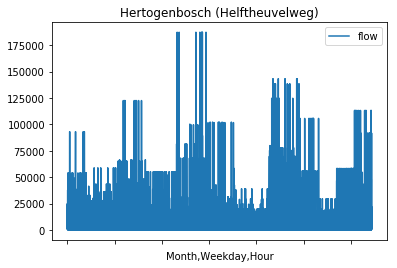

<Figure size 1080x720 with 0 Axes>

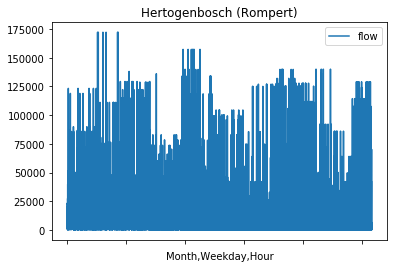

<Figure size 1080x720 with 0 Axes>

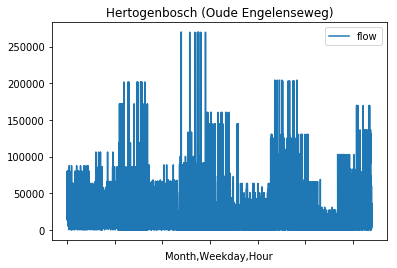

<Figure size 1080x720 with 0 Axes>

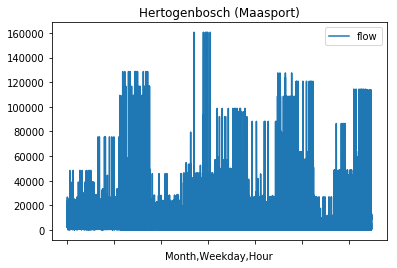

In [22]:
for pump in pumps:
    plt.figure(figsize=(15,10))
    blob[pump].plot()
    plt.title(pump);